In [1]:
!pip install nltk


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader

corpus_root = '/mnt/c/Users/xanto/Documents/Mis Documentos/Literatura/Tesis/Corpus'

canciones = PlaintextCorpusReader(corpus_root,'.*.txt')


## Riqueza lexical de cada canción

Se calcula como $R = \frac{|A_{1}|}{|A_{T}|}$ donde $A_{1}$ es el conjunto de palabras sin repetir y $A_{T}$ es el conjunto de todas las palabras, incluyendo repeticiones.

In [3]:
print("{: <30}{}".format('titulo','R'))
print("{: <30}{}".format('_________________','_________________'))

for cancion in canciones.fileids():
    titulo = cancion.split('-')[0]
    palabras = canciones.words(cancion)
    riqueza = len(set(palabras))/(len(palabras))
    print("{: <30}{}".format(titulo,riqueza))

titulo                        R
_________________             _________________
A veces quiero                0.4609756097560976
Changó                        0.4120443740095087
Deja                          0.32959326788218796
El malo de la película        0.4418238993710692
Equipo de Carretera           0.44783715012722647
Esto es serio                 0.4639344262295082
Genero Rural                  0.4430727023319616
Hip Hop                       0.5120350109409191
Historia de una canción       0.44981412639405205
Házmelo Rap                   0.4096045197740113
Intro (Regaño)                0.49300155520995337
La Penúltima Cena             0.42091836734693877
La historia de una canción    0.44981412639405205
Laura Ronda                   0.4176954732510288
Los Sospechosos de Siempre    0.5052005943536404
Mestizo                       0.544468546637744
Mucho Respeto                 0.5214592274678111
Música para planchar          0.4691823899371069
N.A.D.A                       0.3

## Tratamiento 'Los sospechosos de siempre'

In [2]:
from nltk import word_tokenize, sent_tokenize 

from nltk.corpus import stopwords






In [7]:
import os
import spacy 
from pathlib import Path

nlp = spacy.load('es_core_news_md')

path = "./corpus/puntuacion_corregida"
    
dir_list = os.listdir(path)
    
dir_list = [x for x in dir_list if ".txt" in x]

for i in dir_list:
    
    file = open("./corpus/puntuacion_corregida/"+i, "r")
    
    raw = file.read()
    
    doc = nlp(raw)

    frases = []
    assert doc.has_annotation("SENT_START")
    for sent in doc.sents:
        frases.append(sent.text)

    for frase in frases:
        frase2 = nlp(frase)
        for token in frase2:
    #         print("{:<15}{:<15}{:<15}{:<15}{:<15}{:<15}".format(str(token), str(token.head), str(token.lemma_), str(token.pos_), str(token.tag_), str(token.dep_)))
             print("{:<15}{:<15}{:<15}{:<15}".format(str(token.head), str(token.pos_), str(token.dep_), str(token)))
        options = {"compact": True, "bg": "#09a3d5",
               "color": "black", "font": "Source Sans Pro"}
        # spacy.displacy.render(frase2, style="dep", options=options, page=True) 
        svg = spacy.displacy.render(frase2, style="dep", options=options, jupyter=False)
        file_name = '-'.join([w.text for w in frase2 if not w.is_punct]) + ".svg"
        output_path = Path("./grafos/" + file_name)
        output_path.open("w", encoding="utf-8").write(svg)

*              PUNCT          punct          ~              
quiero         SYM            obj            *              
*              PROPN          appos          Bogotá         
Bogotá         SYM            flat           *              
Bogotá         PUNCT          flat           ~              
~              SPACE          dep            

             
Bogotá         DET            dep            [              
*              PROPN          appos          Estrofa        
Estrofa        NUM            nummod         1              
Estrofa        NUM            flat           ]              
]              SPACE          dep            
              
quiero         ADP            advmod         A              
A              NOUN           fixed          veces          
quiero         NOUN           advmod         solo           
quiero         VERB           ROOT           quiero         
quiero         VERB           xcomp          alejarme       
quiero         PUNCT    

OSError: [Errno 36] File name too long: 'grafos/A-veces-quiero-vivir-en-un-mundo-mágico-sin-que-haya-nada-trágico-sin-que-haya-nada-plástico-donde-lo-único-que-se-nos-pase-rápido-sea-la-tristeza-y- -la-belleza-sea-un-cuore-fantástico-donde-el-látigo-que-la-justicia-vende- -sea-un-ejemplo-consecuente-y-no-haya-gente-indiferente-estar-permanente-donde-el-dolor-se-olvida-y-el-error-sea-el-señor-mentor-que-hacer-mejor-con-vida-\n.svg'

In [30]:
import spacy 
nlp = spacy.load('es_core_news_md')
text = 'Esta es mi vida'  
corp = nlp(text)
for token in corp:
        print("{:<10}{:<10}{:<10}{:<10}{:<10}{:<10}".format(str(token), str(token.head), str(token.lemma_), str(token.pos_), str(token.tag_), str(token.dep_)))
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro"}
spacy.displacy.render(corp, style="dep", options=options)


Esta      vida      este      PRON      PRON      nsubj     
es        vida      ser       AUX       AUX       cop       
mi        vida      mi        DET       DET       det       
vida      vida      vida      NOUN      NOUN      ROOT      


In [7]:


from d3graph import d3graph, vec2adjmat
import spacy 
nlp = spacy.load('es_core_news_md')
text = 'Le capturaron su arma en cuya culata se leía una inscripción y solo decía: esta es mi vida.' # Medallo es un pesebre, los santos son más grandes que las casas de los pobres.

corp = nlp(text)

head=[]
word=[]
label=[]

for token in corp:
    if str(token.pos_) != 'PUNCT':
        head.append(str(token.head))
        word.append(str(token))
        label.append(str(token.dep_))
    else:
        pass

    
print(head, word, label)    
    
#GRAPHICALLY REPRESENT GRAPHS.

adjmat = vec2adjmat(head, word, weight=1.0)

# Initialize
d3 = d3graph()
d3.graph(adjmat)
d3.set_edge_properties(directed=True)

for i in range(len(head)):
    try:
        d3.edge_properties[(head[i], word[i])]['label']=label[i] 
    except:
         print('is root: {}'.format(label[i]))

    
d3.show(filepath='/mnt/c/Users/xanto/Desktop/richie.html')

[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] INFO> Number of unique nodes: 18
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Slider range is set to [0, 1]


['capturaron', 'capturaron', 'arma', 'capturaron', 'culata', 'culata', 'leía', 'leía', 'arma', 'inscripción', 'leía', 'decía', 'decía', 'leía', 'vida', 'vida', 'vida', 'decía'] ['Le', 'capturaron', 'su', 'arma', 'en', 'cuya', 'culata', 'se', 'leía', 'una', 'inscripción', 'y', 'solo', 'decía', 'esta', 'es', 'mi', 'vida'] ['obj', 'ROOT', 'det', 'obj', 'case', 'nmod', 'obl', 'expl:pass', 'acl', 'det', 'nsubj', 'cc', 'advmod', 'conj', 'nsubj', 'cop', 'det', 'ccomp']
is root: ROOT
is root: obl
is root: expl:pass
is root: acl
is root: det
is root: nsubj
is root: cc
is root: advmod
is root: conj
is root: ccomp


[d3graph] INFO> Write to path: [/mnt/c/Users/xanto/Desktop/richie.html]
[d3graph] INFO> File already exists and will be overwritten: [/mnt/c/Users/xanto/Desktop/richie.html]


gio: file:///mnt/c/Users/xanto/Desktop/richie.html: No application is registered as handling this file


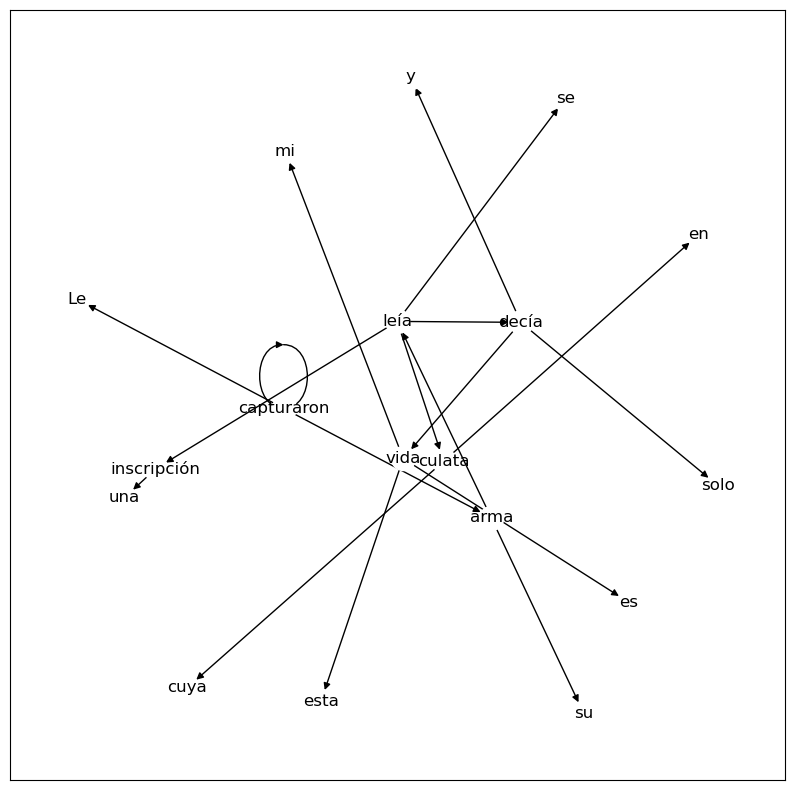

In [8]:
## ANOTHER POSIBLE GRAPHING FUNCTION


import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()
G.add_nodes_from(word)

for i in range(len(word)):
    G.add_edge(head[i], word[i], label=label[i])

plt.figure(figsize=(10,10))    
nx.draw_networkx(G, arrows = True,node_color = "white")
# plt.title("Organogram of a company.")
plt.savefig("richie2.jpeg", dpi = 1080)
plt.show()


In [9]:
G.edges['leía', 'se', 0]

{'label': 'expl:pass'}

In [19]:
from turtle import *

speed(speed=0)

size = 4

def hilbert(level, angle):
    if level == 0:
        return 0
    right(angle)
    hilbert(level - 1, -angle)
    forward(size)
    left(angle)
    hilbert(level - 1, angle)
    forward(size)
    hilbert(level - 1, angle)
    left(angle)
    forward(size)
    hilbert(level - 1, -angle)
    right(angle)

hilbert(20, 90)


Terminator: 